In [2]:
## Data analysis and Data preprocessing on HR dataset
#

In [98]:
## Load libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
## Load dataset
# seperate dataset
dataset1 = pd.read_csv('aug_train.csv')
dataset2 = pd.read_csv('aug_test.csv')

# for analysis combine those dataset into one vertically
dataset = dataset1.append(dataset2, ignore_index = True)
column_name = dataset.columns
dataset.head()



,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [120]:
## General information about dataset
# number of records
print("Total records are : {}".format(len(dataset)))
print("Total records are : {}".format(dataset.shape[0]))

Total records are : 21287
Total records are : 21287


In [121]:
# total number of columns
print("Total columns are : {}".format(len(dataset.columns)))
print("Total columns are : {}".format(dataset.shape[1]))

Total columns are : 14
Total columns are : 14


In [122]:
# Records and Columns together 
print("Shape of dataset : {}".format(dataset.shape))

Shape of dataset : (21287, 14)


In [123]:
## General information
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [124]:
## Statistical Information
#
dataset.describe()

,enrollee_id,city_development_index,training_hours,target
count,21287.000000,21287.000000,21287.000000,19158.000000
mean,16873.983652,0.828462,65.328510,0.249348
std,9612.131237,0.123537,60.075201,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.500000,0.739000,23.000000,0.000000
50%,16967.000000,0.903000,47.000000,0.000000
75%,25161.500000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [125]:
## Check for missing values of each column
#
dataset.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [126]:
# in percentange
NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,enrollee_id,0.000000
1,city,0.000000
2,city_development_index,0.000000
3,gender,23.563677
4,relevent_experience,0.000000
5,enrolled_university,1.958942
6,education_level,2.405224
7,major_discipline,14.680321
8,experience,0.328839
9,company_size,30.816931


In [127]:
# set one threshold like 50% 
# so if column has more than 50 % data missing just drop that column
NAN[NAN['percentage'] > 50]

,column_name,percentage


In [128]:
## Check data types and handle it
dataset.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [129]:
# change if required
# using dictionary to convert specific columns 
convert_dict = {'city': 'category',
                'gender': 'category',
                'relevent_experience':'category',
                'enrolled_university':'category',
                'education_level':'category',
                'major_discipline':
                'category',
                'experience':'category',
                'company_size':'category',
                'company_type':'category',
                'last_new_job': 'category'
               } 
  
dataset = dataset.astype(convert_dict) 
dataset.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
target                     float64
dtype: object

In [130]:
# Using SimpleImputer
# After using simple imputer the column names 
# change into numeric index
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
dataset = imputer.fit_transform(dataset)

dataset = pd.DataFrame(dataset)
dataset.columns = column_name
dataset.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [131]:
dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [132]:
## Dataset with original labels
dataset3 = dataset.copy()
dataset3.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [133]:
## Handle categorical values
# using label encoder for multiple columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cl_names = ['city','gender','relevent_experience','enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

dataset[cl_names] = dataset[cl_names].apply(encoder.fit_transform)
dataset.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.92,1,0,2,0,5,21,4,5,0,36,1
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83,0
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52,1
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0


In [134]:
## To keep track of encoding label
#
encoder.fit_transform(dataset3['gender'])

array([1, 1, 1, ..., 1, 1, 1])

In [140]:
# back to original
encoder.inverse_transform([[0]])

array(['Female'], dtype=object)

In [136]:
## Number of males and females
# 0 - female , 1- male 2- other 
dataset.gender.value_counts()

1    19697
0     1375
2      215
Name: gender, dtype: int64

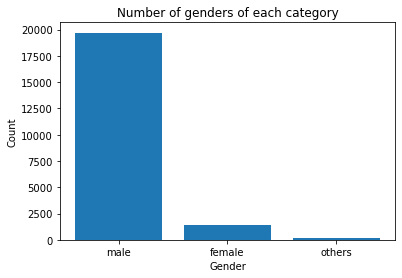

In [151]:
## Visualize it
#
names = ['male', 'female', 'others']
cat = dataset.gender.value_counts()
cat = list(cat)

plt.bar(names, cat)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of genders of each category')
plt.show()
plt.close()

In [152]:
dataset.target.value_counts()

0.0    16510
1.0     4777
Name: target, dtype: int64

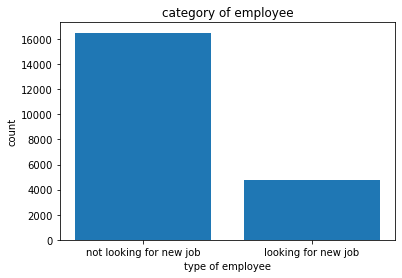

In [153]:
## Number of employees looking for new job and others
#
## Visualize it
#
names = ['not looking for new job', 'looking for new job']
cat = dataset.target.value_counts()
cat = list(cat)

plt.bar(names, cat)
plt.xlabel('type of employee')
plt.ylabel('count')
plt.title('category of employee')
plt.show()
plt.close()

In [161]:
import plotly.express as px
px.box(data_frame=dataset,x='target',y='city_development_index')

In [165]:
import plotly.express as px
px.box(data_frame=dataset,x='target',y='relevent_experience')

In [167]:
## Calculate measure of central dependancy
# Mean
print("The average value of each columns are below.")
print("Mean\n{}\n".format(dataset.mean()))


The average value of each columns are below.
Mean
enrollee_id               16873.983652
city                         44.148494
city_development_index        0.828462
gender                        0.945507
relevent_experience           0.280500
enrolled_university           1.543101
education_level               0.692113
major_discipline              4.719829
experience                   12.962277
company_size                  3.352797
company_type                  4.492554
last_new_job                  1.743881
training_hours               65.328510
target                        0.224409
dtype: float64



In [168]:
# Median
print("The middle value of all the columns are below.")
print("Median\n{}\n".format(dataset.median()))


The middle value of all the columns are below.
Median
enrollee_id               16967.000
city                         48.000
city_development_index        0.903
gender                        1.000
relevent_experience           0.000
enrolled_university           2.000
education_level               0.000
major_discipline              5.000
experience                   14.000
company_size                  4.000
company_type                  5.000
last_new_job                  1.000
training_hours               47.000
target                        0.000
dtype: float64



In [169]:
# Mode
print("The most common value of each column are below.")
print("Mode\n{}\n".format(dataset.mode().iloc[0]))

The most common value of each column are below.
Mode
enrollee_id                  1
city                         5
city_development_index    0.92
gender                       1
relevent_experience          0
enrolled_university          2
education_level              0
major_discipline             5
experience                  21
company_size                 4
company_type                 5
last_new_job                 0
training_hours              28
target                       0
Name: 0, dtype: object



In [171]:
## Measure of dispersion
# Varience
print("Variance\n{}\n".format(dataset.var()))
print("""
If variance is small
- It means all column datapoints are tend to close together and close to mean.
If variance is big
- It means this column datapoints are spread-out with respect to each other and with respect to mean.
""")


Variance
enrollee_id               9.239307e+07
city                      1.250774e+03
city_development_index    1.526128e-02
gender                    7.172732e-02
relevent_experience       2.018292e-01
enrolled_university       6.420278e-01
education_level           9.953070e-01
major_discipline          8.947224e-01
experience                4.364384e+01
company_size              3.204946e+00
company_type              1.670890e+00
last_new_job              3.735020e+00
training_hours            3.609030e+03
target                    1.740579e-01
dtype: float64


If variance is small
- It means all column datapoints are tend to close together and close to mean.
If variance is big
- It means this column datapoints are spread-out with respect to each other and with respect to mean.



In [172]:
# Standard deviation
print("Standard deviation\n{}\n".format(dataset.std()))
print("""
Standard deviation is small.
- It means data points are tightky clustered around mean.
Standard deviation is big.
- It means data points widely spread as compare to other columns.
""")

Standard deviation
enrollee_id               9612.131237
city                        35.366285
city_development_index       0.123537
gender                       0.267820
relevent_experience          0.449254
enrolled_university          0.801266
education_level              0.997651
major_discipline             0.945898
experience                   6.606348
company_size                 1.790236
company_type                 1.292629
last_new_job                 1.932620
training_hours              60.075201
target                       0.417202
dtype: float64


Standard deviation is small.
- It means data points are tightky clustered around mean.
Standard deviation is big.
- It means data points widely spread as compare to other columns.



In [173]:
## Calculate moments
#
from scipy.stats import kurtosis
from scipy.stats import skew
# Skewness
print("Skewness\n{}\n".format(dataset.skew()))
skews = dataset.skew()
sk_list = list()

for i in skews:
    if(i == 0):
        sk_list.append("Normally distributed")
    elif(i < 0):
        sk_list.append("Negatively distributed")
    elif(i>0):
        sk_list.append("Positively distributed")
skewness_result = pd.Series(sk_list)
skewness_result.index = dataset.mean().index

print("The details informaton about skewness below.")
print(skewness_result)


Skewness
enrollee_id              -0.018073
city                      0.400621
city_development_index   -0.987978
gender                   -2.218227
relevent_experience       0.977268
enrolled_university      -1.289169
education_level           1.168718
major_discipline         -3.507149
experience               -0.516797
company_size             -0.108097
company_type             -2.490537
last_new_job              0.563467
training_hours            1.824852
target                    1.321261
dtype: float64

The details informaton about skewness below.
enrollee_id               Negatively distributed
city                      Positively distributed
city_development_index    Negatively distributed
gender                    Negatively distributed
relevent_experience       Positively distributed
enrolled_university       Negatively distributed
education_level           Positively distributed
major_discipline          Negatively distributed
experience                Negatively distributed

In [174]:
# Kurtosis
print("Kurtosis\n{}\n".format(dataset.kurtosis()))
kur = dataset.kurtosis()
sk_list = list()
for i in kur:
    if(i == 0):
        sk_list.append("Mesokurtic")
    elif(i < 0):
        sk_list.append("Leptokurtic")
    elif(i>0):
        sk_list.append("Platykurtic")
kurtosis_result = pd.Series(sk_list)
kurtosis_result.index = dataset.mean().index

print("The details informaton about kurtosis below.")
print(kurtosis_result)


Kurtosis
enrollee_id               -1.193202
city                      -1.014781
city_development_index    -0.554259
gender                     9.466676
relevent_experience       -1.045045
enrolled_university       -0.199157
education_level            0.403923
major_discipline          11.501560
experience                -0.945647
company_size              -0.249785
company_type               4.734492
last_new_job              -1.350897
training_hours             3.861518
target                    -0.254294
dtype: float64

The details informaton about kurtosis below.
enrollee_id               Leptokurtic
city                      Leptokurtic
city_development_index    Leptokurtic
gender                    Platykurtic
relevent_experience       Leptokurtic
enrolled_university       Leptokurtic
education_level           Platykurtic
major_discipline          Platykurtic
experience                Leptokurtic
company_size              Leptokurtic
company_type              Platykurtic
last_new

In [ ]:
##